In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 15

In [2]:
def EulerIntegrator(h,y0,f):
    """
    Делает один шаг методом Эйлера.
    y0 - начальное значение решения в момент времени t=0,
    h - шаг по времения,
    f(y) - правая часть дифференциального уравнения.
    Возвращает приближенное значение y(h).
    """
    return y0+h*f(y0)

def oneStepErrorPlot(f, y, integrator):
    """Рисует график зависимости погрешности одного шага
    интегрирования от длины шага.
    f(y) - правая часть дифференциального уравнения,
    y(t) - точное решение,
    integrator(h,y0,f) - аргументы аналогичны EulerIntegrator.
    """
    eps=np.finfo(float).eps
    steps=np.logspace(-10,0,50) # шаги интегрирования
    y0=y(0) # начальное значение
    yPrecise=[y(t) for t in steps] # точные значения решения
    yApproximate=[integrator(t,y0,f) for t in steps] # приближенные решения
    h=[np.maximum(np.max(np.abs(yp-ya)),eps) for yp, ya in zip(yPrecise, yApproximate)]
    plt.loglog(steps, h, '-')
    plt.xlabel(u"Шаг интегрирования")
    plt.ylabel(u"Погрешность одного шага") 
    
def firstOrderPlot():
    """Рисует на текущем графике прямую y=x."""
    ax = plt.gca()
    steps=np.asarray(ax.get_xlim())
    plt.loglog(steps, steps, '--r')

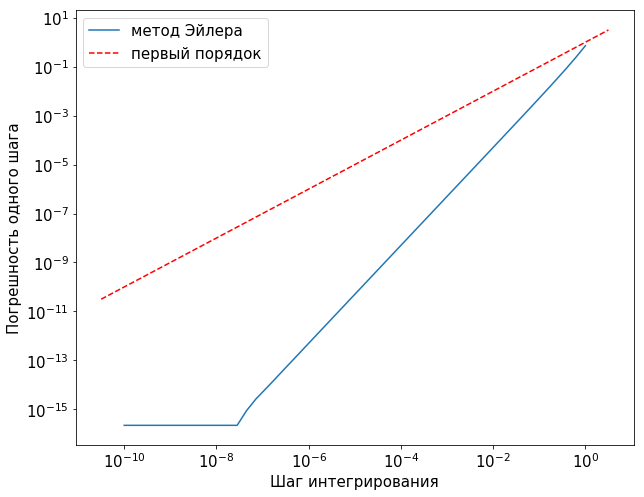

In [97]:
# Тестовая система.
# Правая часть уравнения y'=f(y).
f=lambda y: y
# Аналитическое решение
yExact=lambda t: np.exp(t)

# Строим график ошибок
oneStepErrorPlot(f, yExact, EulerIntegrator)
firstOrderPlot()
plt.legend([u"метод Эйлера",u"первый порядок"],loc=2)
plt.show()

In [142]:
def integrate(N, delta, f, y0, integrator):
    """
    Делает N шагов длины delta метода integrator для уравнения y'=f(y) с начальными условиями y0.
    Возвращает значение решения в конце интервала.
    """
    for n in range(N):
        y0=integrator(delta, y0, f)
    return y0

def intervalErrorPlot(f, y, integrator, T=1, maxNumberOfSteps=1000, numberOfPointsOnPlot=16):
    """
    Рисует график зависимости погрешности интегрирования на интервале
    от длины шага интегрирвания.
    Аргументы повторяют аргументы oneStepErrorPlot.
    """
    eps=np.finfo(float).eps
    numberOfSteps=np.logspace(0,np.log10(maxNumberOfSteps),numberOfPointsOnPlot).astype(np.int)
    steps=T/numberOfSteps # шаги интегрирования
    y0=y(0) # начальное значение
    yPrecise=y(T) # точнре значения решения на правом конце
    yApproximate=[integrate(N,T/N,f,y0,integrator) for N in numberOfSteps] # приближенные решения
    h=[np.maximum(np.max(np.abs(yPrecise-ya)),eps) for ya in yApproximate]
    plt.loglog(steps, h, '.-')
    plt.xlabel("Шаг интегрирования")
    plt.ylabel("Погрешность интегрования на интервале")

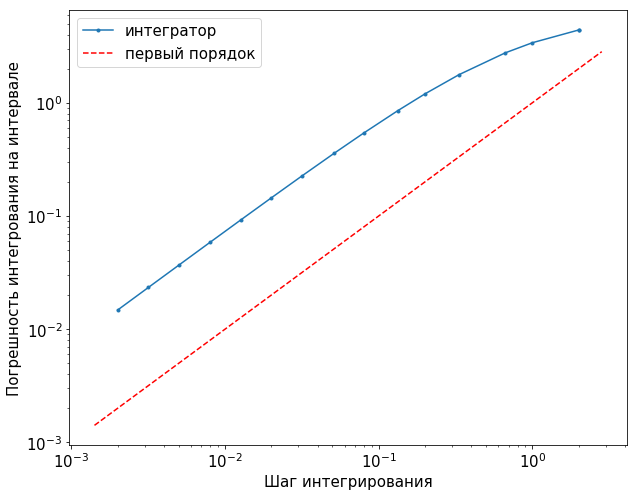

In [100]:
# Строим график ошибок
intervalErrorPlot(f, yExact, EulerIntegrator, T=2)
firstOrderPlot()
plt.legend(["интегратор","первый порядок"],loc=2)
plt.show()

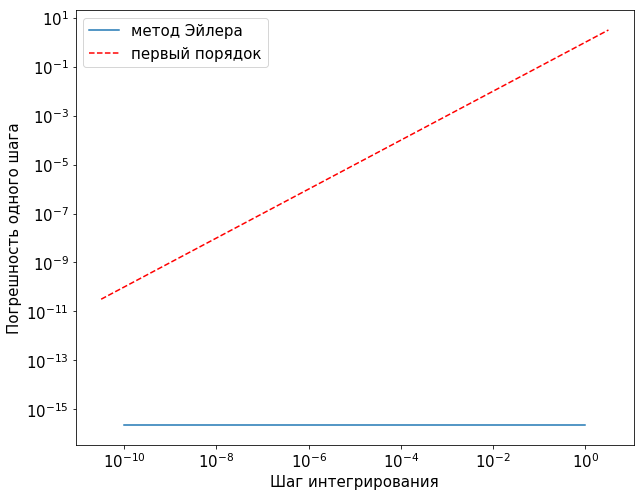

In [5]:
f=lambda y: 1
yExact=lambda t: t

# Строим график ошибок
oneStepErrorPlot(f, yExact, EulerIntegrator)
firstOrderPlot()
plt.legend([u"метод Эйлера",u"первый порядок"],loc=2)
plt.show()

In [6]:
def NewtonIntegrator(h,y0,f):
    """
    Делает один шаг методом Эйлера.
    y0 - начальное значение решения в момент времени t=0,
    h - шаг по времения,
    f(y) - правая часть дифференциального уравнения и его производная.
    Возвращает приближенное значение y(h).
    """
    return y0+h*f[0](y0)+f[0](y0)*f[1](y0)*h*h/2

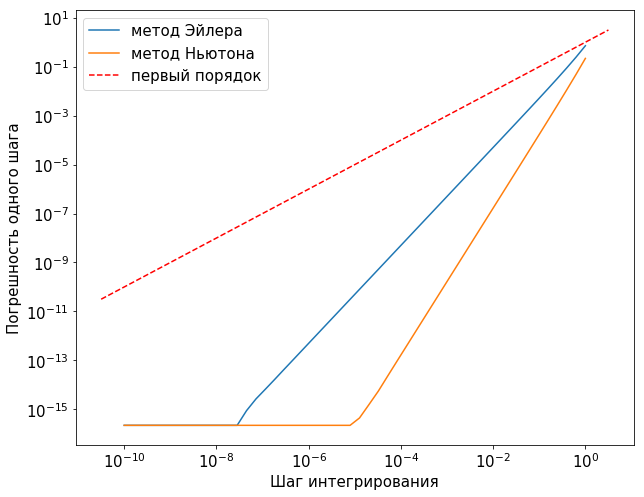

In [7]:
f=(lambda y: y, lambda y: 1)
# Аналитическое решение
yExact=lambda t: np.exp(t)

# Строим график ошибок
oneStepErrorPlot(f[0], yExact, EulerIntegrator)
oneStepErrorPlot(f, yExact, NewtonIntegrator)
firstOrderPlot()
plt.legend([u"метод Эйлера",u"метод Ньютона",u"первый порядок"],loc=2)
plt.show()

In [8]:
def ModifiedEulerIntegrator(h,y0,f):
    """
    Модифицированный метод Эйлера. 
    Аргументы аналогичны EulerIntegrator.
    """
    yIntermediate=y0+f(y0)*h/2
    return y0+h*f(yIntermediate)

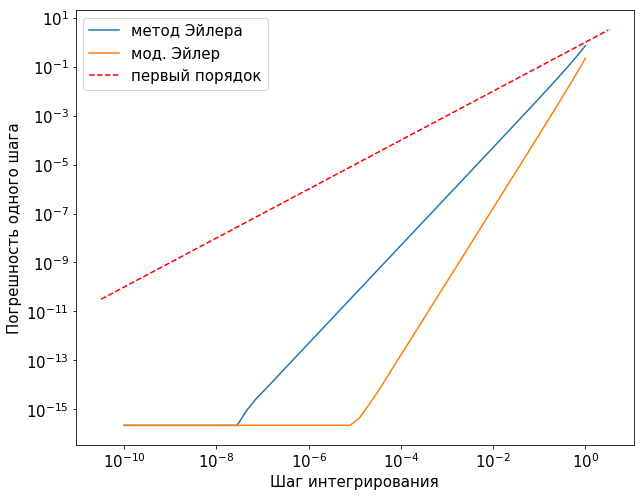

In [9]:
f=lambda y: y
yExact=lambda t: np.exp(t)

# Строим график ошибок
oneStepErrorPlot(f, yExact, EulerIntegrator)
oneStepErrorPlot(f, yExact, ModifiedEulerIntegrator)
firstOrderPlot()
plt.legend([u"метод Эйлера",u"мод. Эйлер",u"первый порядок"],loc=2)
plt.show()

In [10]:
def RungeKuttaIntegrator(h,y0,f):
    """
    Классический метод Рунге-Кутты четвертого порядка. 
    Аргументы аналогичны EulerIntegrator.
    """
    k1=f(y0)
    k2=f(y0+k1*h/2)
    k3=f(y0+k2*h/2)
    k4=f(y0+k3*h)
    return y0+(k1+2*k2+2*k3+k4)*h/6

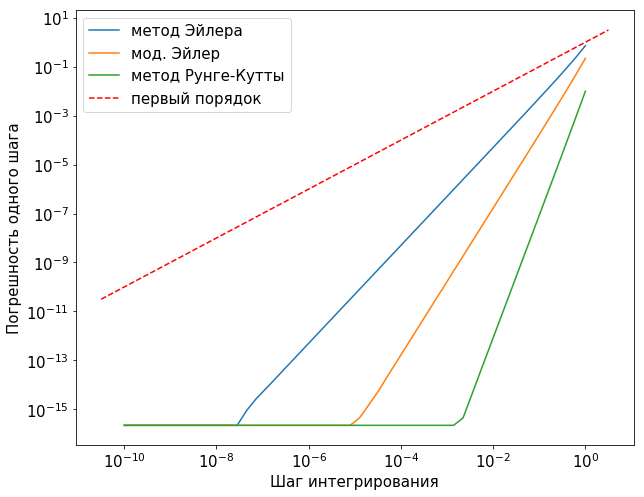

In [87]:
f=lambda y: y
yExact=lambda t: np.exp(t)

# Строим график ошибок
oneStepErrorPlot(f, yExact, EulerIntegrator)
oneStepErrorPlot(f, yExact, ModifiedEulerIntegrator)
oneStepErrorPlot(f, yExact, RungeKuttaIntegrator)
firstOrderPlot()
plt.legend([u"метод Эйлера",u"мод. Эйлер",u"метод Рунге-Кутты",u"первый порядок"],loc=2)
plt.show()

In [12]:
def NewtonMethod(F, x0):
    """
    Находит решение уравнения F(x)=0 методом Ньютона.
    x0 - начальное приближение.
    F=(F(x),dF(x)) - функция и ее производная.
    Возвращает решение уравнения.
    """
    for i in range(100): # ограничиваем максимальное число итераций
        x=x0-F[0](x0)/F[1](x0)
        if x==x0: break # достигнута максимальная точность
        x0=x
    return x0

def BackwardEulerIntegrator(h,y0,f):
    """
    Неявный метод Эйлера. 
    Аргументы аналогичны NewtonIntegrator.
    """
    F=(lambda y: y0+h*f[0](y)-y, lambda y: h*f[1](y)-1)
    return NewtonMethod(F,y0)

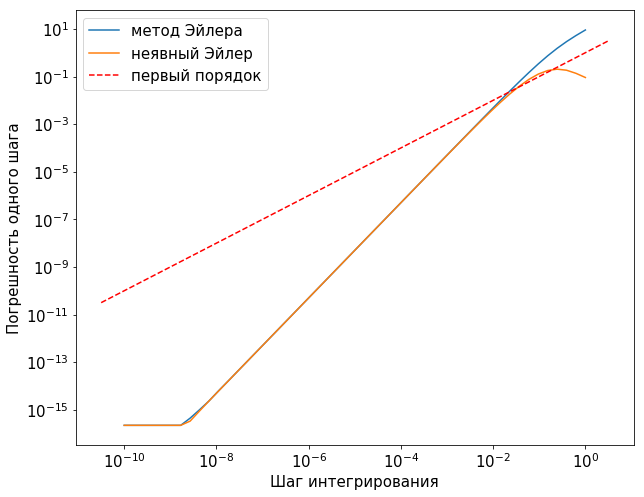

In [13]:
alpha=-10
f=(lambda y: alpha*y, lambda y: alpha)
yExact=lambda t: np.exp(alpha*t)

# Строим график ошибок
oneStepErrorPlot(f[0], yExact, EulerIntegrator)
oneStepErrorPlot(f, yExact, BackwardEulerIntegrator)
firstOrderPlot()
plt.legend([u"метод Эйлера",u"неявный Эйлер",u"первый порядок"],loc=2)
plt.show()

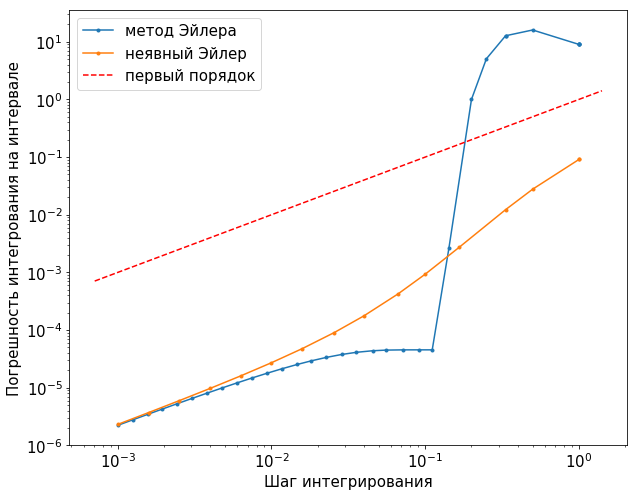

In [14]:
intervalErrorPlot(f[0], yExact, EulerIntegrator,numberOfPointsOnPlot=32)
intervalErrorPlot(f, yExact, BackwardEulerIntegrator,numberOfPointsOnPlot=16)
firstOrderPlot()
plt.legend([u"метод Эйлера",u"неявный Эйлер",u"первый порядок"],loc=2)
plt.show()

In [268]:
def intervalErrorPlot(f, y, integrator, T=1, maxNumberOfSteps=1000, numberOfPointsOnPlot=16):
    """
    Рисует график зависимости погрешности интегрирования на интервале
    от длины шага интегрирвания.
    Аргументы повторяют аргументы oneStepErrorPlot.
    """
    eps=np.finfo(float).eps
    numberOfSteps=np.logspace(0,np.log10(maxNumberOfSteps),numberOfPointsOnPlot).astype(np.int)
    steps=T/numberOfSteps # шаги интегрирования
    y0=y(0) # начальное значение
    yPrecise=y(T) # точнре значения решения на правом конце
    yApproximate=[integrate(N,T/N,f,y0,integrator) for N in numberOfSteps] # приближенные решения
    h=[np.abs(yPrecise-ya) for ya in yApproximate]
    plt.loglog(steps, h, '.-')
    plt.xlabel("Шаг интегрирования")
    plt.ylabel("Погрешность интегрования на интервале [{}, {}]".format(0, round(T,2)))

## Задание 2. 

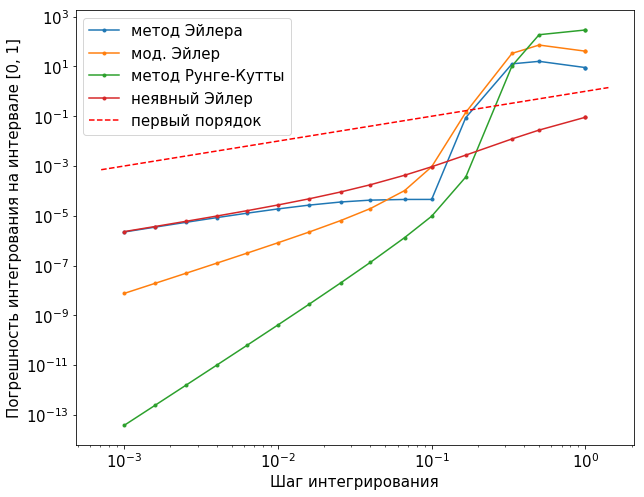

In [269]:
alpha=-10
f=(lambda y: alpha*y, lambda y: alpha)
yExact=lambda t: np.exp(alpha*t)

intervalErrorPlot(f[0], yExact, EulerIntegrator)
intervalErrorPlot(f[0], yExact, ModifiedEulerIntegrator)
intervalErrorPlot(f[0], yExact, RungeKuttaIntegrator)
intervalErrorPlot(f, yExact, BackwardEulerIntegrator)
firstOrderPlot()
plt.legend([u"метод Эйлера", u"мод. Эйлер", u"метод Рунге-Кутты", u"неявный Эйлер", u"первый порядок"], loc=2)
plt.show()

## Задание 4

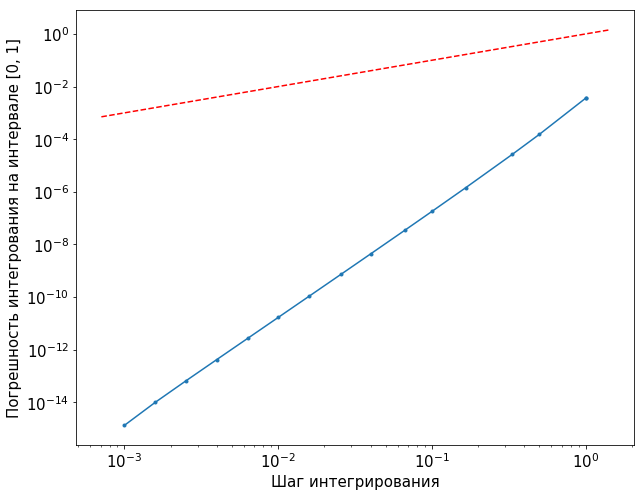

In [270]:
f = lambda y: np.cos(y)
y_exact = lambda t: 2*np.arctan(np.tanh(t/2 + np.arctanh(np.tan(1/2))))
y0 = 1
assert y0 == y_exact(0)

# intervalErrorPlot(f, y_exact, EulerIntegrator, T=1, maxNumberOfSteps=1000, numberOfPointsOnPlot=16)
# intervalErrorPlot(f, y_exact, ModifiedEulerIntegrator, T=1, maxNumberOfSteps=1000, numberOfPointsOnPlot=16)
intervalErrorPlot(f, y_exact, RungeKuttaIntegrator, T=1, maxNumberOfSteps=1000, numberOfPointsOnPlot=16)
firstOrderPlot()

In [274]:
def intervalSolutionPlot(f, y, integrator, T=1, maxNumberOfSteps=1000, numberOfPointsOnPlot=16):
    """
    Рисует график зависимости решения на интервале от длины шага интегрирвания.
    Аргументы повторяют аргументы oneStepErrorPlot.
    """
    eps=np.finfo(float).eps
    numberOfSteps=np.logspace(0, np.log10(maxNumberOfSteps), numberOfPointsOnPlot).astype(np.int)
    steps=T/numberOfSteps # шаги интегрирования
    y0 = y # начальное значение
    yApproximate=[integrate(N, T/N, f, y0, integrator) for N in numberOfSteps] # приближенные решения
    yApproximate = np.array(yApproximate)
    plt.plot(np.log10(steps), yApproximate, '.-')
    plt.xlabel("Шаг интегрирования (log)")
    plt.ylabel("Значение интегрования на интервале [{}, {}]".format(0, round(T,2)))

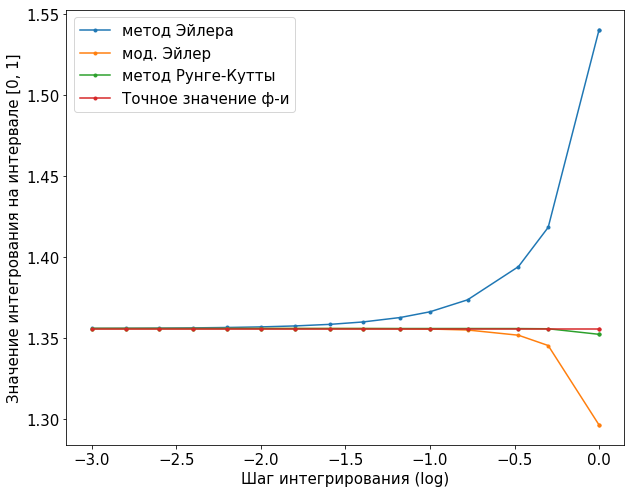

In [275]:
f = lambda y: np.cos(y)
y0 = 1
intervalSolutionPlot(f, y0, EulerIntegrator)
intervalSolutionPlot(f, y0, ModifiedEulerIntegrator)
intervalSolutionPlot(f, y0, RungeKuttaIntegrator)

f = lambda y: 0
f_exact = lambda t: 2*np.arctan(np.tanh(t/2 + np.arctanh(np.tan(1/2))))
y0 = f_exact(1)
intervalSolutionPlot(f, y0, EulerIntegrator)

plt.legend([u"метод Эйлера", u"мод. Эйлер", u"метод Рунге-Кутты", "Точное значение ф-и"], loc=2)
plt.show()

In [226]:
def derivative_plot(f, interval, n_steps):
    """
    Plots f'(x) on interval [interval[0], interval[1]] at n_steps points
    """
    xs = np.arange(interval[0], interval[1], (interval[1] - interval[0]) / n_steps)
    ys = []
    for i in range(len(xs) - 1):
        ys.append((f(xs[i+1]) - f(xs[i])) / (xs[i+1] - xs[i]))
    ys = np.array(ys)
    plt.plot(xs[1:], ys)

In [124]:
def func_plot(f, interval, n_steps):
    """
    Plots f(x) on interval [interval[0], interval[1]] at n_steps points
    """
    xs = np.arange(interval[0], interval[1], (interval[1] - interval[0]) / n_steps)
    ys = []
    for x in xs:
        ys.append(f(x))
    ys = np.array(ys)
    plt.plot(xs, ys)

Проверим достоверность найденного точного решения

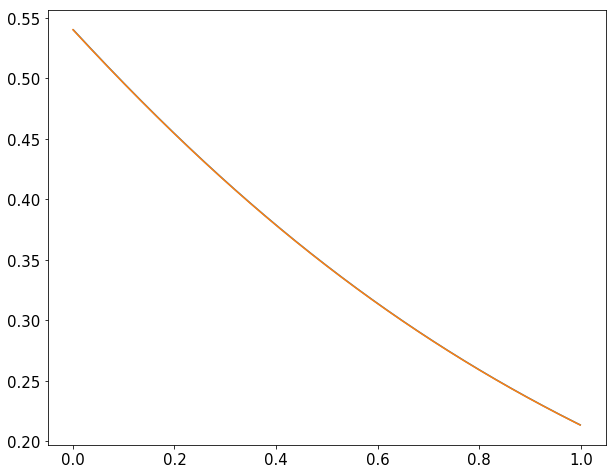

In [128]:
f = lambda t: 2*np.arctan(np.tanh(t/2 + np.arctanh(np.tan(1/2))))
f_deriv = lambda t: np.cos(2*np.arctan(np.tanh(t/2 + np.arctanh(np.tan(1/2)))))
derivative_plot(f, (0, 1), 1000)
func_plot(f_deriv, (0, 1), 1000)
plt.show()

## Задание 5.

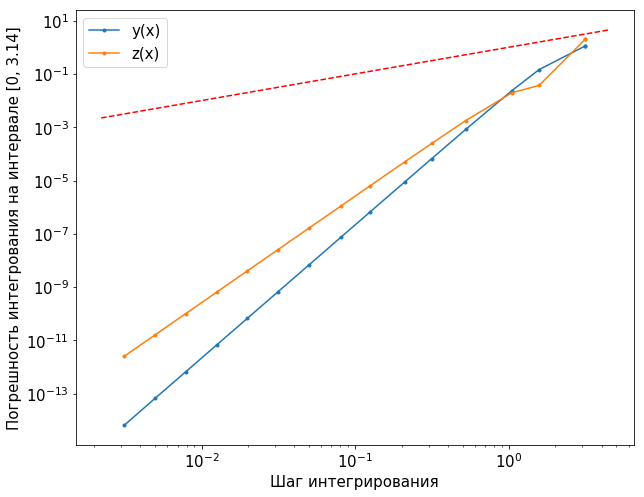

In [276]:
# f[0]: y'(t) = z(t)
# f[1]: z'(t) = -y(t)
f = lambda y: np.array([y[1], -y[0]])
y_exact = lambda t: (np.cos(t),  -np.sin(t))
y0 = (1, 0)

# intervalErrorPlot(f, y_exact, EulerIntegrator, T=1, maxNumberOfSteps=1000, numberOfPointsOnPlot=16)
# intervalErrorPlot(f, y_exact, ModifiedEulerIntegrator, T=1, maxNumberOfSteps=1000, numberOfPointsOnPlot=16)
intervalErrorPlot(f, y_exact, RungeKuttaIntegrator, T=np.pi, maxNumberOfSteps=1000, numberOfPointsOnPlot=16)
firstOrderPlot()
plt.legend([u"y(x)", u"z(x)"], loc=2)
plt.show()

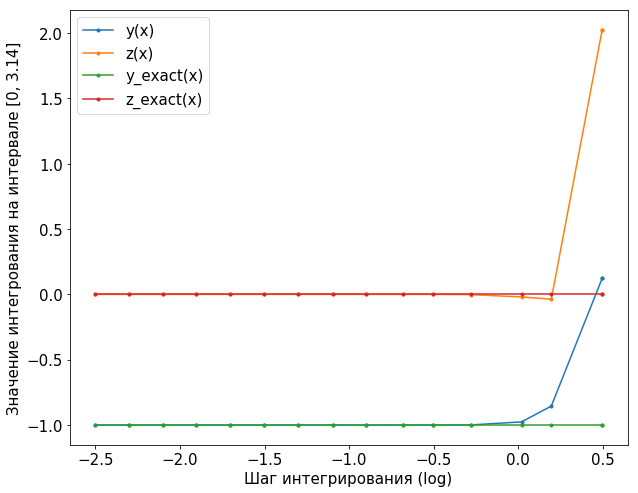

In [277]:
f = lambda y: np.array([y[1], -y[0]])
y_exact = lambda t: (np.cos(t),  -np.sin(t))
y0 = (1, 0)

# intervalSolutionPlot(f, y0, EulerIntegrator, T=np.pi)
# intervalSolutionPlot(f, y0, ModifiedEulerIntegrator, T=np.pi)
intervalSolutionPlot(f, y0, RungeKuttaIntegrator, T=np.pi)

f = lambda y: np.array([0, 0])
y0 = (-1, 0)
intervalSolutionPlot(f, y0, EulerIntegrator, T=np.pi)

plt.legend([u"y(x)", u"z(x)", "y_exact(x)", "z_exact(x)"], loc=2)

plt.show()